# Exploring LAPD Stop Data

In [514]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import numpy as np
from matplotlib import style as style
from matplotlib import cm

## I. Business Understanding

In this notebook, I will use visualization tools like matplotlib and seaborn to answer questions about police stops in the city of Los Angeles from 2010-2020. I will be using data released by the Los Angeles Police Department with information on every stop since 2010.


### Questions
1. Are certain races stopped at higher rates? Has this changed over time?
2. Do stop rates differ between races based on the type of stop or time of day?
3. Are there disparities in "post stop activity" - whether or not an officer will frisk, search, cite, or arrest the person they stopped? Has this changed over time?

## II. Data Understanding

Here is a link to the data I will use: https://data.lacity.org/A-Safe-City/Vehicle-and-Pedestrian-Stop-Data-2010-to-Present/ci25-wgt7.



### Importing Dataset

In [515]:
df = pd.read_csv('Vehicle_and_Pedestrian_Stop_Data_2010_to_Present.csv', parse_dates = ['Stop Date', 'Stop Time'])

C:\Users\Jordan Nishimura\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (11,13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [516]:
df.head()

,Stop Number,Form Reference Number,Sex Code,Descent Code,Descent Description,Stop Date,Stop Time,Officer 1 Serial Number,Officer 1 Division Number,Division Description 1,Officer 2 Serial Number,Officer 2 Division Number,Division Description 2,Reporting District,Stop Type,Post Stop Activity Indicator
0,12984268,27426327,M,B,BLACK,2016-08-06,2020-09-04 21:55:00,47908.0,19,MISSION,NaN,NaN,NaN,1918,PED,N
1,12987768,27429717,F,B,BLACK,2016-08-09,2020-09-04 00:10:00,47544.0,26,VALLEY TRAFFIC,NaN,NaN,NaN,974,VEH,N
2,12987840,27429775,F,W,WHITE,2016-08-09,2020-09-04 19:39:00,59798.0,08,WEST LA,NaN,NaN,NaN,822,VEH,N
3,12991260,27434259,F,A,ASIAN,2016-08-10,2020-09-04 20:55:00,16003.0,08,WEST LA,NaN,NaN,NaN,833,VEH,N
4,12991647,27434592,F,W,WHITE,2016-08-10,2020-09-04 20:20:00,47933.0,19,MISSION,NaN,NaN,NaN,914,PED,Y


In [517]:
print(df.shape)

(7891465, 16)


In [518]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7891465 entries, 0 to 7891464
Data columns (total 16 columns):
Stop Number                     int64
Form Reference Number           int64
Sex Code                        object
Descent Code                    object
Descent Description             object
Stop Date                       datetime64[ns]
Stop Time                       datetime64[ns]
Officer 1 Serial Number         float64
Officer 1 Division Number       object
Division Description 1          object
Officer 2 Serial Number         float64
Officer 2 Division Number       object
Division Description 2          object
Reporting District              object
Stop Type                       object
Post Stop Activity Indicator    object
dtypes: datetime64[ns](2), float64(2), int64(2), object(10)
memory usage: 963.3+ MB


In [519]:
# Because the memory usage is quite large. I am going to try to convert some of the data types to use less memory. 
data_types = {'Sex Code':'category', 
              'Descent Description':'category', 
              'Stop Type':'category', 
              'Post Stop Activity Indicator':'category'}

df = df.astype(data_types, errors='ignore')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7891465 entries, 0 to 7891464
Data columns (total 16 columns):
Stop Number                     int64
Form Reference Number           int64
Sex Code                        category
Descent Code                    object
Descent Description             category
Stop Date                       datetime64[ns]
Stop Time                       datetime64[ns]
Officer 1 Serial Number         float64
Officer 1 Division Number       object
Division Description 1          object
Officer 2 Serial Number         float64
Officer 2 Division Number       object
Division Description 2          object
Reporting District              object
Stop Type                       category
Post Stop Activity Indicator    category
dtypes: category(4), datetime64[ns](2), float64(2), int64(2), object(6)
memory usage: 752.6+ MB


In [520]:
# split the date and time into separate columns

df['Stop Year'] = df['Stop Date'].dt.year.astype('uint16', errors='ignore')
df['Stop Month'] = df['Stop Date'].dt.month.astype('uint8', errors='ignore')
df['Stop Day'] = df['Stop Date'].dt.day.astype('uint8', errors='ignore')
df['Stop Day Name'] = df['Stop Date'].dt.dayofweek.astype('uint8', errors='ignore')
df['Stop Hour'] = df['Stop Time'].dt.hour.astype('uint8', errors='ignore')

In [521]:
df2 = df.drop(columns=['Officer 1 Serial Number', 'Officer 1 Division Number', 'Division Description 1', 
                       'Officer 2 Serial Number', 'Officer 2 Division Number', 'Division Description 2', 'Reporting District'])

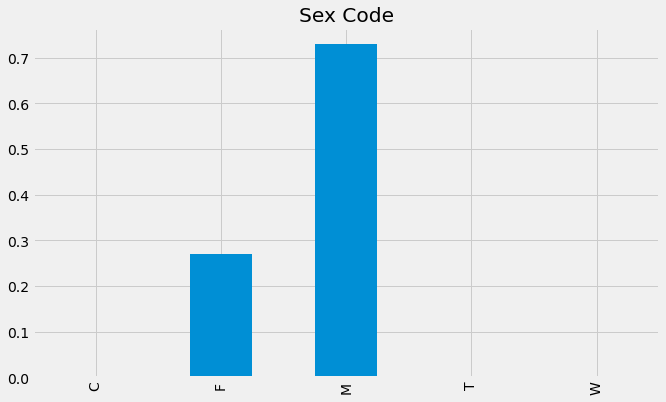

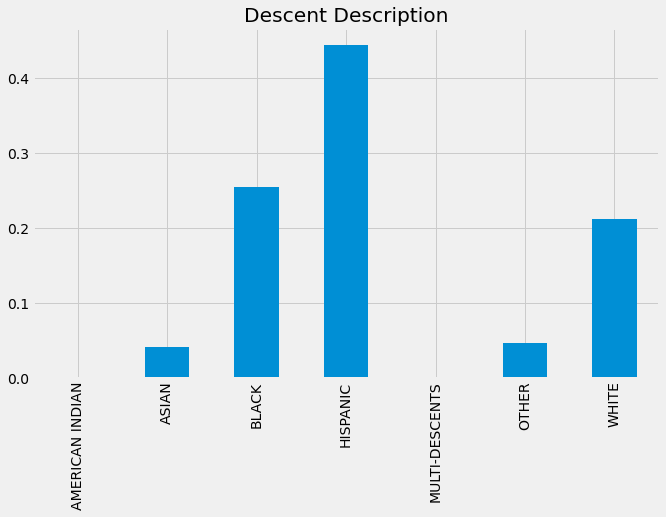

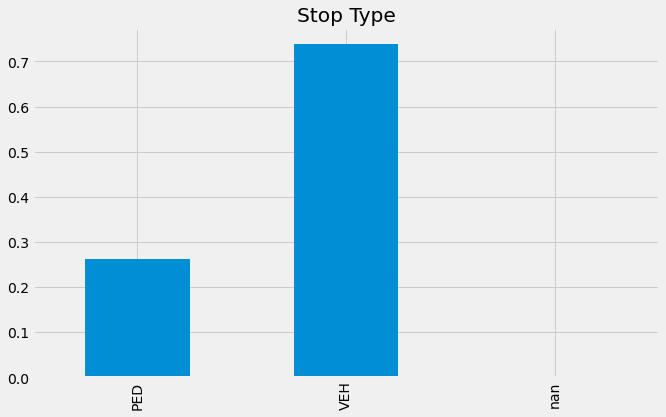

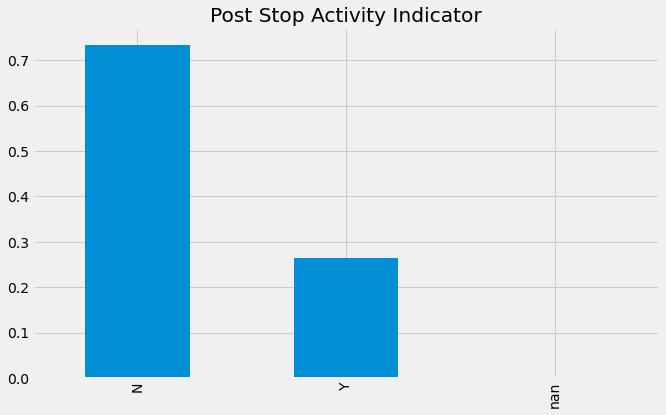

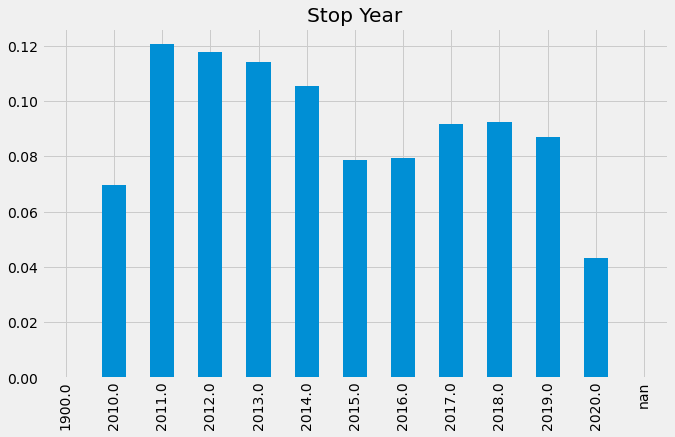

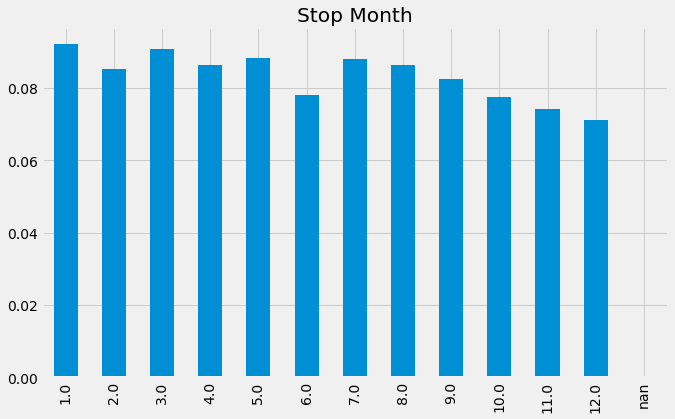

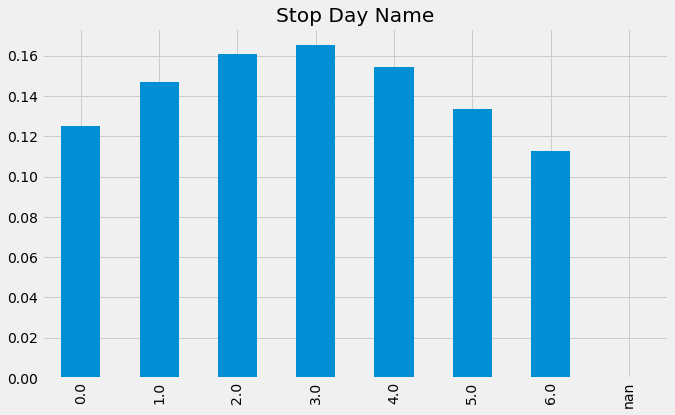

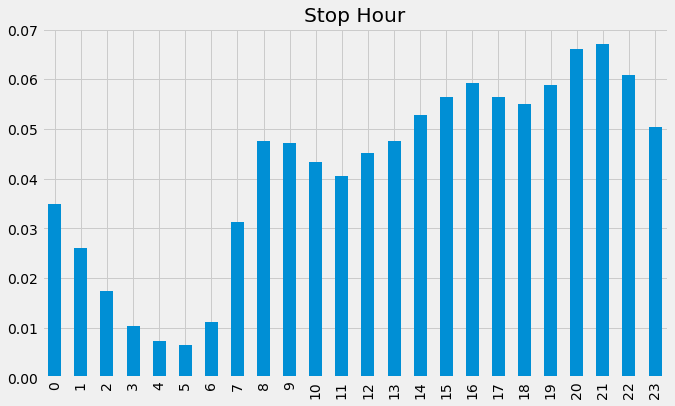

In [522]:
# Lets see the distributions of the categorical data
style.use('fivethirtyeight')

cat_columns = ['Sex Code', 'Descent Description', 'Stop Type', 'Post Stop Activity Indicator', 
               'Stop Year', 'Stop Month', 'Stop Day Name', 'Stop Hour']

for col in cat_columns:
    fig, ax = plt.subplots(figsize=(10, 6))
    df2[col].value_counts(normalize=True, dropna=False).sort_index().plot.bar(ax=ax)
    ax.set_title(col)
    plt.show()

I wanted to see the distributions of these variables. 

Here are a few general insights: 
1. Males make up over 70% of all stops
2. About 45% of all stops are of people of Hispanic descent, 25% are people of black descent, 22% white descent.
3. Most stops are vehicle stops (73%), compared to 27% pedestrian stops.
4. About 73% of stops result in post-stop activity.
5. The fewest number of stops happened in 2010. After 2010, there was a large increase in 2011 (about 70%). Since then, there has been a gradual downward trend, with the exception of 2015-2018 that saw small increases.
6. The month with the most stops is January. The month with the fewest stops is December.
7. Thursday has the most stops. Monday and Sunday have the fewest.
8. Stops are most frequently occuring between 8pm and 11pm. The times when the fewest stops occur are 3am - 7am.  

## Data Understanding Summary 

1. Loaded the data into a pandas dataframe
2. Changed the datatypes of certain columns to use less memory. 
3. Selected only columns needed to answer our questions.
4. Split up the time and date columns into separate Stop Year, Stop Month, Day, Stop Day Name, and Stop Hour columns.
5. Created graphs to view the distribution of 8 columns: 'Sex Code', 'Descent Description', 'Stop Type', 'Post Stop Activity Indicator', 'Stop Year', 'Stop Month', 'Stop Day Name', 'Stop Hour'

## III. Data Preparation

### Removing Values

In [523]:
# I am only analyzing the 2010 decade (2010-2019), so I will remove the 2020 year stops.

df2 = df2[df2['Stop Year'] != 2020]

In [524]:
df2['Stop Year'].value_counts()

2011.0    950636
2012.0    929796
2013.0    899445
2014.0    832809
2018.0    729016
2017.0    724384
2019.0    685011
2016.0    627677
2015.0    620315
2010.0    549940
1900.0         1
Name: Stop Year, dtype: int64

In the Stop Year column, I see there is a value of 1900, which is most likely a data entry error because this dataset should only include data from 2010 to present. However, because we can still use the data in the other columns, I will replace the 1900 with NaN so that the year doesn't appear in our graphs. 

In [528]:
df2.loc[df2['Stop Year']==1900, 'Stop Year'] = np.nan
df2['Stop Year'].value_counts()

2011.0    950636
2012.0    929796
2013.0    899445
2014.0    832809
2018.0    729016
2017.0    724384
2019.0    685011
2016.0    627677
2015.0    620315
2010.0    549940
Name: Stop Year, dtype: int64

### Null-Values

In [529]:
df2.isnull().sum()

Stop Number                       0
Form Reference Number             0
Sex Code                          0
Descent Code                      0
Descent Description               0
Stop Date                         1
Stop Time                         0
Stop Type                         1
Post Stop Activity Indicator    175
Stop Year                         2
Stop Month                        1
Stop Day                          1
Stop Day Name                     1
Stop Hour                         0
dtype: int64

We have two rows with a null 'Stop Year', one row with a null 'Stop Date' (and thus 'Stop Year', 'Stop Month', 'Stop Day', 'Stop Day Name'), one row with a null 'Stop Type', and 175 rows with a null 'Post Stop Activity Indicator'

In [533]:
df[df['Stop Year'].isnull()]

,Stop Number,Form Reference Number,Sex Code,Descent Code,Descent Description,Stop Date,Stop Time,Officer 1 Serial Number,Officer 1 Division Number,Division Description 1,...,Officer 2 Division Number,Division Description 2,Reporting District,Stop Type,Post Stop Activity Indicator,Stop Year,Stop Month,Stop Day,Stop Day Name,Stop Hour
5406843,13230802,27714774,M,B,BLACK,NaT,2020-09-04 02:58:00,49366.0,07,WILSHIRE,...,07,WILSHIRE,776,VEH,N,NaN,NaN,NaN,NaN,2


We can check the 'Officer 1 Serial Number' to see if the officer may have only worked one year so that we can impute the Stop Year with that year.

In [534]:
df[df['Officer 1 Serial Number'] == 49366]

,Stop Number,Form Reference Number,Sex Code,Descent Code,Descent Description,Stop Date,Stop Time,Officer 1 Serial Number,Officer 1 Division Number,Division Description 1,...,Officer 2 Division Number,Division Description 2,Reporting District,Stop Type,Post Stop Activity Indicator,Stop Year,Stop Month,Stop Day,Stop Day Name,Stop Hour
260653,7884696,10354029,M,H,HISPANIC,2010-03-09,2020-09-04 01:00:00,49366.0,5,HARBOR,...,NaN,NaN,503,VEH,N,2010.0,3.0,9.0,1.0,1
260654,7884697,10354030,F,H,HISPANIC,2010-03-09,2020-09-04 02:30:00,49366.0,5,HARBOR,...,NaN,NaN,529,VEH,N,2010.0,3.0,9.0,1.0,2
260655,7884698,10354031,F,H,HISPANIC,2010-03-09,2020-09-04 04:00:00,49366.0,5,HARBOR,...,NaN,NaN,519,VEH,N,2010.0,3.0,9.0,1.0,4
260656,7884699,10354032,M,H,HISPANIC,2010-03-09,2020-09-04 04:55:00,49366.0,5,HARBOR,...,NaN,NaN,513,VEH,N,2010.0,3.0,9.0,1.0,4
260657,7884700,10354032,F,H,HISPANIC,2010-03-09,2020-09-04 04:55:00,49366.0,5,HARBOR,...,NaN,NaN,513,VEH,N,2010.0,3.0,9.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5781057,9408907,21360062,M,B,BLACK,2012-02-02,2020-09-04 20:15:00,49366.0,05,HARBOR,...,NaN,NaN,514,VEH,N,2012.0,2.0,2.0,3.0,20
5818678,13634932,30298113,M,B,BLACK,2017-08-15,2020-09-04 08:30:00,49366.0,03,SOUTH WEST,...,NaN,NaN,392,PED,Y,2017.0,8.0,15.0,1.0,8
5840675,13656929,30314582,M,H,HISPANIC,2017-08-24,2020-09-04 13:05:00,49366.0,03,SOUTH WEST,...,NaN,NaN,0355,PED,Y,2017.0,8.0,24.0,3.0,13
6444222,14260598,30749882,M,H,HISPANIC,2018-05-12,2020-09-04 10:20:00,49366.0,18,SOUTH EAST,...,NaN,NaN,1834,PED,Y,2018.0,5.0,12.0,5.0,10


Unfortunately the officer has made arrests from all years 2010-2019, so I can't impute that value, but even without the date (which was likely a data entry error) I can still use the data from the other columns so I will not remove it.

Now I will check the row with the null "Stop Type". 

In [535]:
df[df['Stop Type'].isnull()]

,Stop Number,Form Reference Number,Sex Code,Descent Code,Descent Description,Stop Date,Stop Time,Officer 1 Serial Number,Officer 1 Division Number,Division Description 1,...,Officer 2 Division Number,Division Description 2,Reporting District,Stop Type,Post Stop Activity Indicator,Stop Year,Stop Month,Stop Day,Stop Day Name,Stop Hour
417953,8484445,8042490,M,B,BLACK,2011-01-24,2020-09-04 08:53:00,26378.0,13,NEWTON,...,NaN,NaN,1375,NaN,NaN,2011.0,1.0,24.0,0.0,8


Again, it appears this data was simply not entered by the officer. We still have some data from the other rows so I will keep it.

Lastly I will examine the 175 'Post Stop Activity Indicator' nulls to see if there is any pattern or indication of what they are. 

In [536]:
df[df['Post Stop Activity Indicator'].isnull()]

,Stop Number,Form Reference Number,Sex Code,Descent Code,Descent Description,Stop Date,Stop Time,Officer 1 Serial Number,Officer 1 Division Number,Division Description 1,...,Officer 2 Division Number,Division Description 2,Reporting District,Stop Type,Post Stop Activity Indicator,Stop Year,Stop Month,Stop Day,Stop Day Name,Stop Hour
1147,8469475,5617726,F,W,WHITE,2011-01-19,2020-09-04 13:14:00,16041.0,17,DEVONSHIRE,...,NaN,NaN,1775,PED,NaN,2011.0,1.0,19.0,2.0,13
5808,8469471,5617722,M,H,HISPANIC,2011-01-19,2020-09-04 13:14:00,27216.0,17,DEVONSHIRE,...,NaN,NaN,1700,PED,NaN,2011.0,1.0,19.0,2.0,13
14868,8495186,8924847,F,H,HISPANIC,2011-01-26,2020-09-04 10:24:00,18247.0,25,SOUTH TRAFFIC,...,NaN,NaN,1245,VEH,NaN,2011.0,1.0,26.0,2.0,10
15678,8495187,8924848,M,B,BLACK,2011-01-26,2020-09-04 10:24:00,18247.0,25,SOUTH TRAFFIC,...,NaN,NaN,1245,VEH,NaN,2011.0,1.0,26.0,2.0,10
16917,8469470,5617721,M,H,HISPANIC,2011-01-19,2020-09-04 13:14:00,27216.0,17,DEVONSHIRE,...,NaN,NaN,1700,PED,NaN,2011.0,1.0,19.0,2.0,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5369508,8490306,5850480,M,W,WHITE,2011-01-25,2020-09-04 10:49:00,17708.0,17,DEVONSHIRE,...,17,DEVONSHIRE,1701,PED,NaN,2011.0,1.0,25.0,1.0,10
5369509,8490308,5850482,M,W,WHITE,2011-01-25,2020-09-04 10:49:00,17708.0,17,DEVONSHIRE,...,17,DEVONSHIRE,1701,VEH,NaN,2011.0,1.0,25.0,1.0,10
5369510,8490309,5850483,M,H,HISPANIC,2011-01-25,2020-09-04 10:49:00,17708.0,17,DEVONSHIRE,...,17,DEVONSHIRE,1722,VEH,NaN,2011.0,1.0,25.0,1.0,10
5369520,8490307,5850481,M,O,OTHER,2011-01-25,2020-09-04 10:49:00,27216.0,17,DEVONSHIRE,...,17,DEVONSHIRE,1754,VEH,NaN,2011.0,1.0,25.0,1.0,10


In [512]:
columns = ['Sex Code', 'Descent Description', 'Officer 1 Serial Number', 'Division Description 1', 'Stop Type', 'Stop Year']     # Lets see how the null values are distributed across these categories
post_stop_nulls = df[df['Post Stop Activity Indicator'].isnull()]

for col in columns:
    print(col)
    print(post_stop_nulls[col].value_counts())
    print('\n')

Sex Code
M    135
F     40
W      0
T      0
C      0
Name: Sex Code, dtype: int64


Descent Description
HISPANIC           82
WHITE              47
BLACK              39
ASIAN               5
OTHER               2
MULTI-DESCENTS      0
AMERICAN INDIAN     0
Name: Descent Description, dtype: int64


Officer 1 Serial Number
18247.0    27
16041.0    16
26378.0    15
20068.0    11
26382.0    10
17571.0    10
26392.0     6
27216.0     6
47556.0     5
21186.0     5
47092.0     5
21588.0     4
47610.0     3
20883.0     3
17708.0     3
18749.0     2
48951.0     2
20710.0     2
22300.0     2
14628.0     2
23713.0     2
16046.0     2
24043.0     2
11232.0     2
16058.0     2
23596.0     1
18754.0     1
47939.0     1
46766.0     1
13725.0     1
11829.0     1
11496.0     1
21384.0     1
20920.0     1
18172.0     1
24780.0     1
23302.0     1
20300.0     1
10840.0     1
12895.0     1
17655.0     1
20779.0     1
46921.0     1
11347.0     1
16084.0     1
48377.0     1
20540.0     1
24040.0     1
149

The majority of these nulls come from 2011, are vehicle stops, come from the Devonshire division, are by people of hispanic descent, and male.

It is also interesting that more than half (89/175) of them come from only 6 officers. 

Because I am not building a model, it is not absolutely necessary to impute or drop the null values.
I will simply use the data that is available as they apply to the questions I have, so I will keep these values as well.

### Data Preparation Summary

1. Removed stops in the year 2020, since the year is not complete and I am only analyzing the 2010 decade (2010-2019).
2. We removed the row with the year 1900, as this dataset should only include stops since 2010. 
3. We examined rows with other null data and determined we could use the data from other columns even if one column was missing, because we are not creating a model and just doing data analysis.


## IV. Evaluate the Results


## Question 1: Are certain races stopped at higher rates? Has this changed over time?


### 1.1 LAPD stops by Race

In [100]:
df2['Descent Description'].value_counts(normalize=True)

HISPANIC           0.443088
BLACK              0.253927
WHITE              0.213035
OTHER              0.048729
ASIAN              0.039737
MULTI-DESCENTS     0.000801
AMERICAN INDIAN    0.000684
Name: Descent Description, dtype: float64

['HISPANIC', 'BLACK', 'WHITE', 'OTHER', 'ASIAN', 'MULTI-DESCENTS', 'AMERICAN INDIAN']


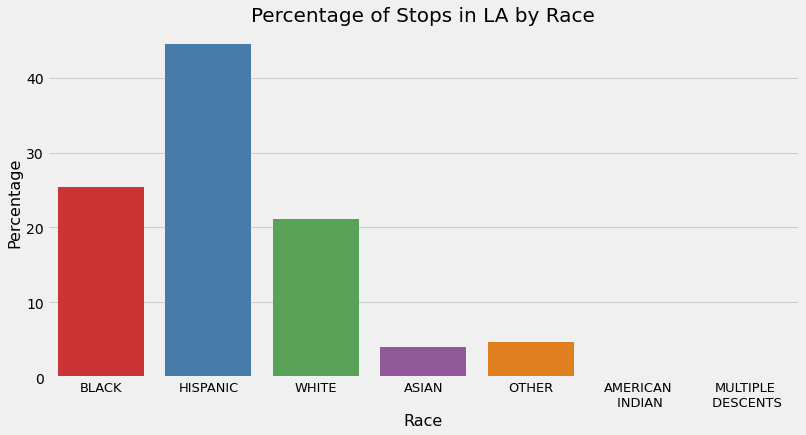

In [115]:
race_breakdown = pd.DataFrame(df['Descent Description'].value_counts(normalize=True)).sort_values('Descent Description', ascending=False).reset_index()
race_breakdown = race_breakdown.rename(columns={'index':'Race', 'Descent Description':'Percentage'})
print(race_breakdown['Race'].tolist())

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x=race_breakdown['Race'], y=race_breakdown['Percentage'], order=['BLACK', 'HISPANIC', 'WHITE', 'ASIAN', 'OTHER', 'AMERICAN INDIAN', 'MULTI-DESCENT'], ax=ax, palette='Set1')
ax.set_title('Percentage of Stops in LA by Race', fontsize=20)
ax.set_xlabel('Race', fontsize=16)
ax.set_xticklabels(['BLACK', 'HISPANIC', 'WHITE', 'ASIAN', 'OTHER', 'AMERICAN\n INDIAN', 'MULTIPLE\n DESCENTS'], fontsize=13)
ax.set_ylabel('Percentage', fontsize=16)
ax.set_yticklabels([0, 10, 20, 30, 40])

plt.savefig('Percent_stops_by_race.jpg')

In the 2010 decade, 44% of the stops were of people of Hispanic descent, 25% Black, and 21% White. Asians made up about 4%, and "Other" made up about 5% of the stops. American Indian and people of Multiple Descents make up such a small fraction that it doesn't show up on the graph. This is not surprising, because LA has such a large Hispanic population. In order for this to be useful, we should normalize for each race's population in LA.

In [116]:
# I got this data from the http://www.laalmanac.com/population/po38_2010.php
la_population = {'AMERICAN INDIAN':28065, 'ASIAN':427049, 'BLACK':365229, 'OTHER':908712, 'MULTI-DESCENTS':175598, 'WHITE':1086965, 'HISPANIC':1838663}


In [117]:
# I divide the number of stops by the population of that race, and then multiply by 10000 to get the stops per 10000 people to normalize the number of stops for populations of different races in LA. 

stops_race_normalized = pd.DataFrame(df2['Descent Description'].value_counts()).reset_index()
stops_race_normalized['Stops per 10000'] = stops_race_normalized.apply(lambda x: 10000 * x['Descent Description'] / la_population[x['index']], axis=1)
stops_race_normalized['Annual Stops per 10000'] = stops_race_normalized['Stops per 10000'] / 10   # I divide by 10 so that I've have an average per year, not for the whole decade.
stops_race_normalized


,index,Descent Description,Stops per 10000,Annual Stops per 10000
0,HISPANIC,3344883,18191.930767,1819.193077
1,BLACK,1916899,52484.851970,5248.485197
2,WHITE,1608210,14795.416596,1479.541660
3,OTHER,367860,4048.147268,404.814727
4,ASIAN,299973,7024.322736,702.432274
5,MULTI-DESCENTS,6043,344.138316,34.413832
6,AMERICAN INDIAN,5162,1839.301621,183.930162


Text(0, 0.5, 'Stops per 10000 residents')

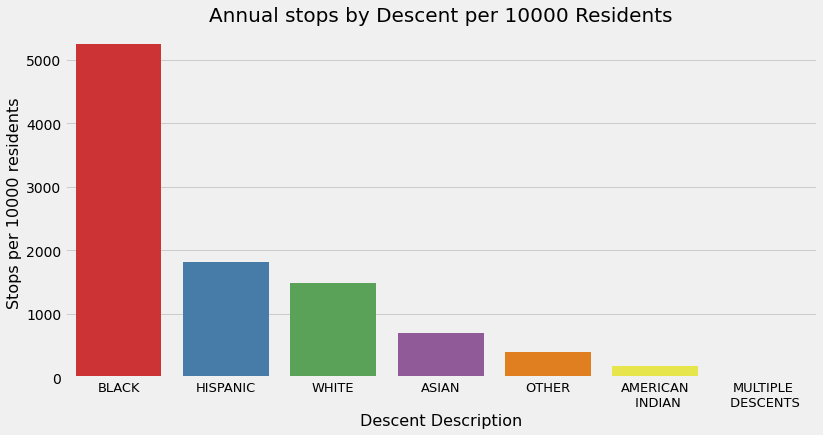

In [118]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='index', y='Annual Stops per 10000', data = stops_race_normalized, order=['BLACK', 'HISPANIC', 'WHITE', 'ASIAN', 'OTHER', 'AMERICAN INDIAN', 'MULTI-DESCENT'], ax=ax, palette='Set1')
ax.set_title('Annual stops by Descent per 10000 Residents', fontsize=20)
ax.set_xlabel('Descent Description', fontsize=16)
ax.set_xticklabels(['BLACK', 'HISPANIC', 'WHITE', 'ASIAN', 'OTHER', 'AMERICAN\n INDIAN', 'MULTIPLE\n DESCENTS'], fontsize=13)
ax.set_ylabel('Stops per 10000 residents', fontsize=16)


After controlling for population, it appears that Black people are pulled over far more than any other race with respect to their population in LA. For every 10000 black residents, they are stopped over 5000 times. 
Hispanics are stopped about 1800 times per 10000 Hispanic residents, Whites are stopped about 1500 times per 10000 white residents, and Asians are stopped about 700 times per 10000 Asian residents. 

In [119]:
df2['count'] = 1 # This will be helpful to use pivot_tables. I could also use value_counts but I prefer this method. 

### 1.2 How have stops of each race changed over time?

In [ ]:
sns.barplot(x='Stop Year', y='')

In [124]:
race_year = pd.pivot_table(df2, index='Stop Year', columns='Descent Description', values='count', aggfunc=np.sum, fill_value=0)
race_year

Descent Description,AMERICAN INDIAN,ASIAN,BLACK,HISPANIC,MULTI-DESCENTS,OTHER,WHITE
Stop Year,,,,,,,
2010.0,457,24892,109899,220857,0,30561,163274
2011.0,904,36638,228073,406029,0,49535,229457
2012.0,626,36404,224933,400381,0,50796,216656
2013.0,611,32455,219993,393922,0,50098,202366
2014.0,498,29246,197663,373428,0,53119,178855
2015.0,369,19863,161108,279592,0,36155,123228
2016.0,344,17998,171107,290632,0,34935,112661
2017.0,413,21126,204829,328324,0,40765,128927
2018.0,500,31799,212256,336474,2517,20216,125254


In [395]:
la_pop_array = np.array([28065, 427049, 365229, 1838663, 175598, 908712, 1086965])   # I reordered these numbers to match the order of the columns in the dataframe. 

race_year_per_10000 = 10000 * np.divide(race_year, la_pop_array)   # The number of stops per 10000 residents by race and year

race_year_per_10000 = race_year_per_10000[['BLACK','HISPANIC', 'WHITE', 'ASIAN', 'OTHER', 'AMERICAN INDIAN', 'MULTI-DESCENTS']]  # Reorder the columns so they match the bars above when graphed.
race_year_per_10000_pct_change = race_year_per_10000.pct_change()
race_year_per_10000_pct_change
race_year_per_10000

Descent Description,BLACK,HISPANIC,WHITE,ASIAN,OTHER,AMERICAN INDIAN,MULTI-DESCENTS
Stop Year,,,,,,,
2010.0,3009.043641,1201.182598,1502.109084,582.883931,336.311174,162.836273,0.000000
2011.0,6244.657461,2208.283954,2110.987934,857.934335,545.112203,322.109389,0.000000
2012.0,6158.684004,2177.565981,1993.219653,852.454871,558.988987,223.053626,0.000000
2013.0,6023.426398,2142.437195,1861.752678,759.983046,551.307785,217.708890,0.000000
2014.0,5412.029165,2030.975769,1645.453165,684.839445,584.552642,177.445216,0.000000
2015.0,4411.150265,1520.626673,1133.688757,465.122269,397.870833,131.480492,0.000000
2016.0,4684.923705,1580.670302,1036.473116,421.450466,384.445237,122.572599,0.000000
2017.0,5608.234833,1785.667085,1186.119148,494.697330,448.601977,147.158382,0.000000
2018.0,5811.586703,1829.992772,1152.327812,744.621812,222.468725,178.157848,143.338762


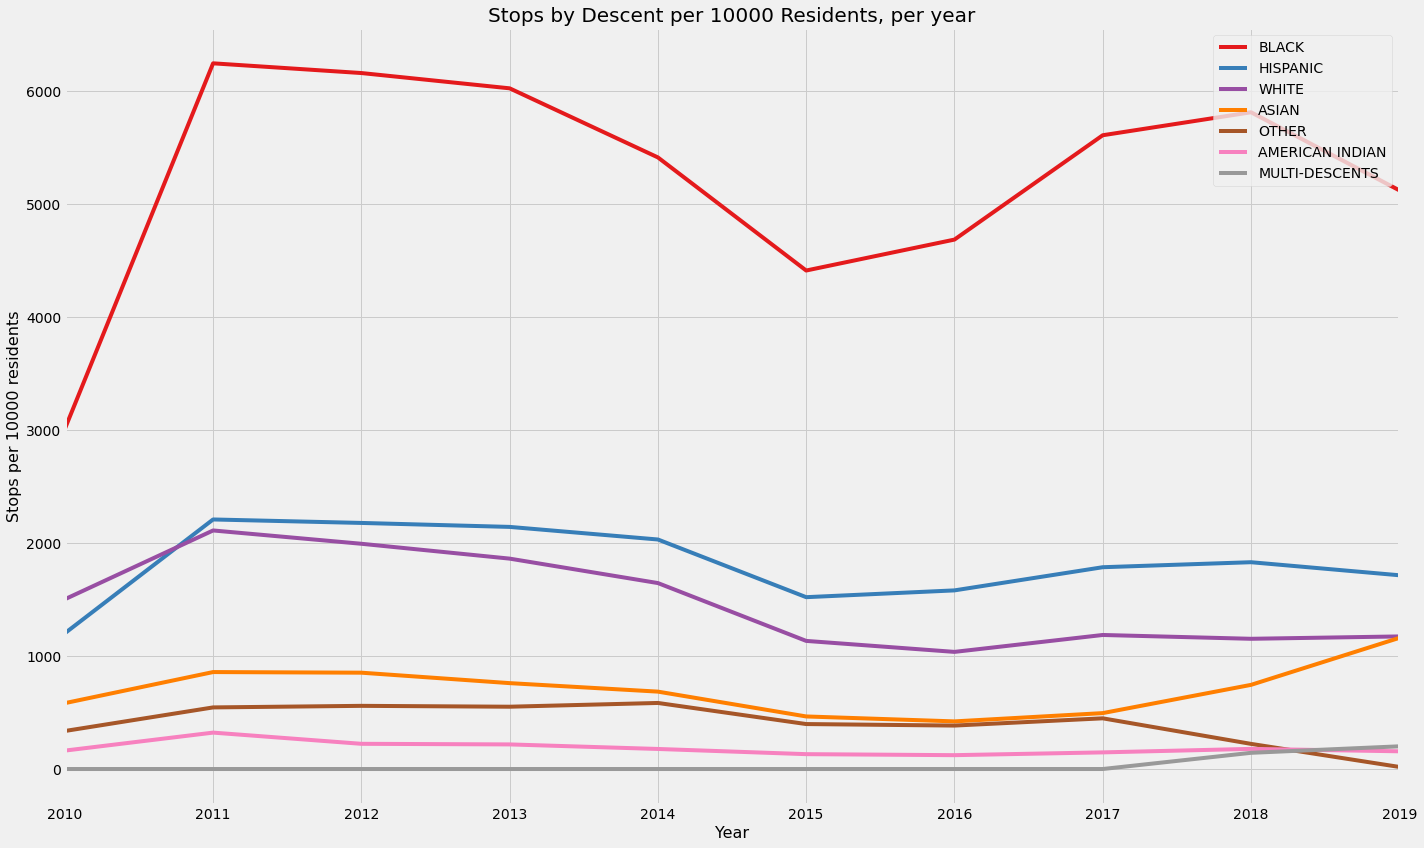

In [391]:
fig, ax = plt.subplots()
race_year_per_10000.plot(kind='line', figsize=(20, 12), ax=ax, cmap = 'Set1')

ax.set_title('Stops by Descent per 10000 Residents, per year', fontsize=20)
ax.set_xlabel('Year', fontsize=16)
ax.set_xticklabels(range(2010, 2020), fontsize=14)
ax.set_ylabel('Stops per 10000 residents', fontsize=16)
plt.legend(loc='upper right')
plt.tight_layout()

plt.savefig('Stops by Race per year.jpg', pad_inches=1)


It looks like stops of Black people increased sharply from 2010, then gradually decreased until 2015, where it started rising again.
Hispanic and white stops have roughly followed the same trends. An increase from 2010-2011, then gradual and small decreasins until 2015, where there were small increases.
Asian and Other stops roughly stayed the same utnil 2017. From there, Asian stops increased quite significantly whereas "Other" stops decreased significant.
American Indian stops stayed pretty much the same in all years. Multi-Descent only became a category in 2018, so there is not enough data to see a trend 

## Question 2: Do stop rates differ between races based on the type of stop or time of day?


### 2.1 Comparing Pedestrian vs Vehicle stops by Race

In [433]:
stop_type_year_df = pd.pivot_table(df2, index=['Stop Year', 'Descent Description'], columns=['Stop Type'], values=['count'], aggfunc=np.sum)    # Create a pivot table with the totals of each stop type per year per race.   

annual_df = stop_type_year_df.groupby('Descent Description')[('count', 'PED'), ('count', 'VEH')].mean()       # Find the mean Pedestrian and Vehicle stops per year for each race
annual_df.columns = annual_df.columns.droplevel()                        # Drop the multi-level columns
annual_df.columns = annual_df.columns.astype('str')                      # Change the column type so that I can reset_index

annual_df = annual_df.reset_index()
annual_df

Stop Type,Descent Description,PED,VEH
0,AMERICAN INDIAN,147.6,368.6
1,ASIAN,3178.5,26818.8
2,BLACK,64592.2,127097.5
3,HISPANIC,91886.1,242602.2
4,MULTI-DESCENTS,761.0,2260.5
5,OTHER,3821.3,32964.7
6,WHITE,33749.9,127071.1


In [434]:
annual_df['PED_per_10000'] = annual_df.apply(lambda row: 10000 * row['PED'] / la_population[row['Descent Description']], axis=1)         # Control for population differences (divide by resident population and multiply by 10000)
annual_df['VEH_per_10000'] = annual_df.apply(lambda row: 10000 * row['VEH'] / la_population[row['Descent Description']], axis=1)          # Control for population differences (divide by resident population and multiply by 10000)

annual_df['order'] = np.array([6, 4, 1, 2, 7, 5, 3])                 # Reorder the columns so the bars are in the same order as above when graphed. 
annual_df.sort_values('order', inplace=True)                         

annual_df['ratio_to_white_pedestrian'] = annual_df['PED_per_10000'] / annual_df.loc[annual_df['Descent Description'] == 'WHITE', 'PED_per_10000'].values[0]   # divide the ped_per_10000 of each race by the to white pedestrian stops
annual_df['ratio_to_white_vehicle'] = annual_df['VEH_per_10000'] / annual_df.loc[annual_df['Descent Description'] == 'WHITE', 'VEH_per_10000'].values[0]      # divide the veh_per_10000 of each race by the to white vehicle stops
annual_df

Stop Type,Descent Description,PED,VEH,PED_per_10000,VEH_per_10000,order,ratio_to_white_pedestrian,ratio_to_white_vehicle
2,BLACK,64592.2,127097.5,1768.539738,3479.939983,1,5.695841,2.976737
3,HISPANIC,91886.1,242602.2,499.744108,1319.448969,2,1.609499,1.128655
6,WHITE,33749.9,127071.1,310.496658,1169.045001,3,1.000000,1.000000
1,ASIAN,3178.5,26818.8,74.429398,628.002876,4,0.239711,0.537193
5,OTHER,3821.3,32964.7,42.051827,362.762900,5,0.135434,0.310307
0,AMERICAN INDIAN,147.6,368.6,52.592197,131.337965,6,0.169381,0.112346
4,MULTI-DESCENTS,761.0,2260.5,43.337623,128.731535,7,0.139575,0.110117


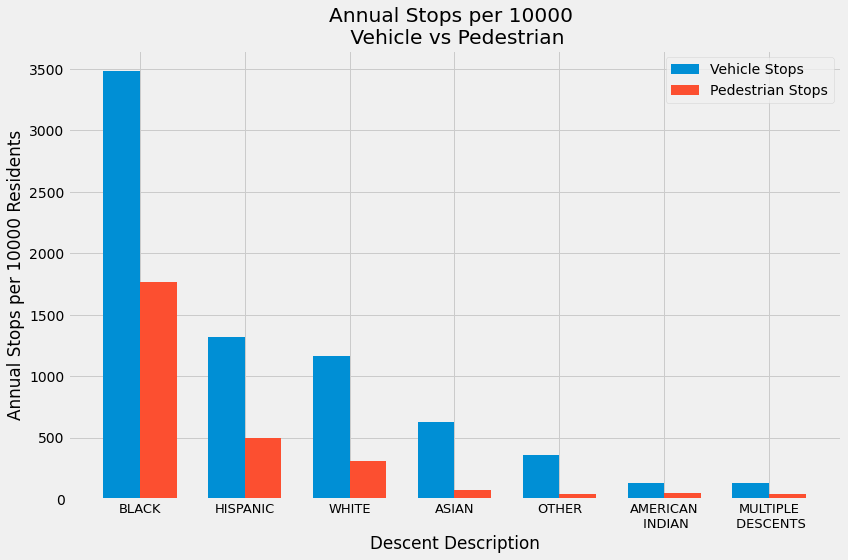

In [396]:
# Visualize the results above by creating a grouped bar chart comparing Vehicle and Pedestrian stops across races 

fig, ax = plt.subplots(figsize=(12, 8))

ind = np.arange(len(vehicle_stops_10000))
width = 0.35

ax.bar(x=ind-width/2, height='VEH_per_10000', width=width, data = annual_df, label = 'Vehicle Stops')
ax.bar(x=ind+width/2, height='PED_per_10000', width=width, data = annual_df, label = 'Pedestrian Stops')

ax.set_title('Annual Stops per 10000 \n Vehicle vs Pedestrian')
ax.set_xticks(ind)
ax.set_xticklabels(['BLACK', 'HISPANIC', 'WHITE', 'ASIAN', 'OTHER', 'AMERICAN\n INDIAN', 'MULTIPLE\n DESCENTS'], fontsize=13)
ax.set_ylabel('Annual Stops per 10000 Residents')
ax.set_xlabel('Descent Description')
plt.legend()
plt.tight_layout()

plt.savefig('Vehicle vs Pedestrian Stops.jpg', pad_inches=1, quality=95)

Vehicle stops occur much more than pedestrian stops across all races.
Relative to white stops, Black vehicle stops occur 3 times as often, while Black pedestrian stops occur 5.7 times as often.
Relative to white stops, Hispanic vehicle stops occur 1.1 times more often, while Hispanic pedestrian stops occur 1.8 times as often.  

### 2.2 Comparing Stops at Day vs Night by Race

In [465]:
df2['is_night'] = 1 - df2['Stop Hour'].between(6,19)   # I define "day" to be between 8:00pm and 5:59am and night is 6:00am - 7:59pm

df2

,Stop Number,Form Reference Number,Sex Code,Descent Code,Descent Description,Stop Date,Stop Time,Stop Type,Post Stop Activity Indicator,Stop Year,Stop Month,Stop Day,Stop Day Name,Stop Hour,count,is_dark,is_night
0,12984268,27426327,M,B,BLACK,2016-08-06,2020-09-02 21:55:00,PED,N,2016.0,8.0,6.0,5.0,21,1,1,1
1,12987768,27429717,F,B,BLACK,2016-08-09,2020-09-02 00:10:00,VEH,N,2016.0,8.0,9.0,1.0,0,1,1,1
2,12987840,27429775,F,W,WHITE,2016-08-09,2020-09-02 19:39:00,VEH,N,2016.0,8.0,9.0,1.0,19,1,0,0
3,12991260,27434259,F,A,ASIAN,2016-08-10,2020-09-02 20:55:00,VEH,N,2016.0,8.0,10.0,2.0,20,1,1,1
4,12991647,27434592,F,W,WHITE,2016-08-10,2020-09-02 20:20:00,PED,Y,2016.0,8.0,10.0,2.0,20,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7660483,15248753,31552996,M,A,ASIAN,2019-08-30,2020-09-02 16:30:00,PED,Y,2019.0,8.0,30.0,4.0,16,1,0,0
7660484,15248754,31552996,M,W,WHITE,2019-08-30,2020-09-02 16:30:00,PED,Y,2019.0,8.0,30.0,4.0,16,1,0,0
7660485,15389299,31676209,F,W,WHITE,2019-11-11,2020-09-02 02:12:00,VEH,N,2019.0,11.0,11.0,0.0,2,1,1,1
7705695,15636330,31901972,M,H,HISPANIC,2019-12-31,2020-09-02 01:12:00,VEH,N,2019.0,12.0,31.0,1.0,1,1,1,1


In [467]:
is_night_year_df = pd.pivot_table(df2, index=['Stop Year', 'Descent Description'], columns=['is_night'], values=['count'], aggfunc=np.sum)    # Create a pivot table that totals the number of day (0) and night (1) stops by race per year.  
is_night_year_df.columns = is_night_year_df.columns.droplevel()


is_night_year_df = is_night_year_df.groupby('Descent Description')[0, 1].mean()       # Find the average Day and Night stops per year for each race


is_night_year_df = is_night_year_df.reset_index()

is_night_year_df['day_per_10000'] = is_night_year_df.apply(lambda row: 10000 * row[0] / la_population[row['Descent Description']], axis=1)             # Control for population differences (divide by resident population and multiply by 10000)
is_night_year_df['night_per_10000'] = is_night_year_df.apply(lambda row: 10000 * row[1] / la_population[row['Descent Description']], axis=1)          # Control for population differences (divide by resident population and multiply by 10000)

is_night_year_df['order'] = np.array([6, 5, 1, 2, 7, 5, 3])                                      # reorder rows so the bars in bar graph are consistent
is_night_year_df.sort_values('order', inplace=True)


is_night_year_df['day_ratio_to_white'] = is_night_year_df['day_per_10000'] / is_night_year_df.loc[is_night_year_df['Descent Description'] == 'WHITE', 'day_per_10000'].values[0]             # computes the ratio to white stops by dividing the ped_per_10000 of each race by the to white pedestrian stops
is_night_year_df['night_ratio_to_white'] = is_night_year_df['night_per_10000'] / is_night_year_df.loc[is_night_year_df['Descent Description'] == 'WHITE', 'night_per_10000'].values[0]      # computes the ratio to white stops by dividing the ped_per_10000 of each race by the to white pedestrian stops

is_night_year_df

is_night,Descent Description,0,1,day_per_10000,night_per_10000,order,day_ratio_to_white,night_ratio_to_white
2,BLACK,118567.5,73122.3,3246.387883,2002.094576,1,2.986305,5.101533
3,HISPANIC,206105.5,128382.8,1120.953106,698.239971,2,1.031148,1.779184
6,WHITE,118163.1,42657.9,1087.092041,392.449619,3,1.000000,1.000000
1,ASIAN,21922.7,8074.6,513.353269,189.079005,5,0.472226,0.481792
5,OTHER,25665.2,11120.8,282.434919,122.379808,5,0.259808,0.311836
0,AMERICAN INDIAN,331.8,184.4,118.225548,65.704614,6,0.108754,0.167422
4,MULTI-DESCENTS,1942.0,1079.5,110.593515,61.475643,7,0.101733,0.156646


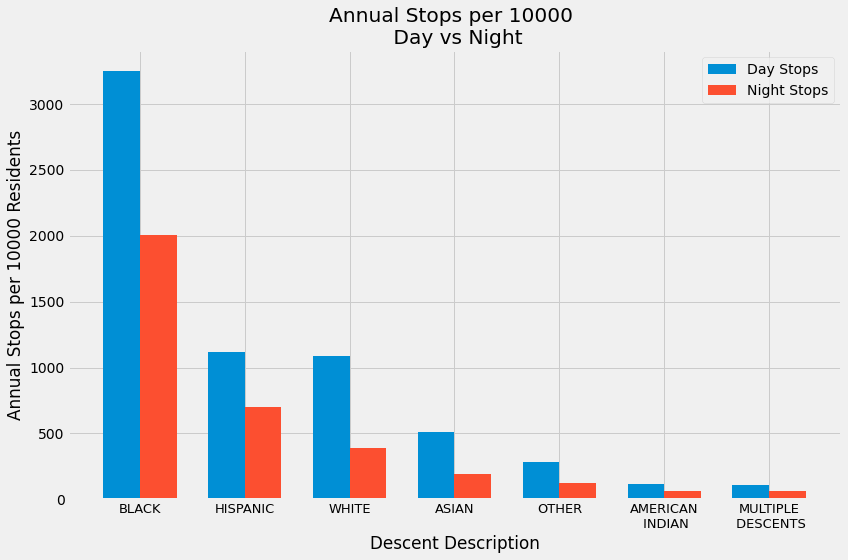

In [439]:
# creates a grouped barplot to visualize the above results

fig, ax = plt.subplots(figsize=(12, 8))

ind = np.arange(len(is_dark_year_df))
width = 0.35


ax.bar(x=ind-width/2, height='day_per_10000', width=width, data = is_dark_year_df, label = 'Day Stops')
ax.bar(x=ind+width/2, height='night_per_10000', width=width, data = is_dark_year_df, label = 'Night Stops')

ax.set_title('Annual Stops per 10000 \n Day vs Night')
ax.set_xticks(ind)
ax.set_xticklabels(['BLACK', 'HISPANIC', 'WHITE', 'ASIAN', 'OTHER', 'AMERICAN\n INDIAN', 'MULTIPLE\n DESCENTS'], fontsize=13)
ax.set_ylabel('Annual Stops per 10000 Residents')
ax.set_xlabel('Descent Description')
plt.legend()
plt.tight_layout()

plt.savefig('day vs night stops by race.jpg', quality=95, pad_inches=1)

We can see day stops occur more often amont all races. 
If we compare rates between races, we see that black people are about 3 times as likely as whites to be stopped in the day, but 5.1 times more likely to be stopped at night than white people. 
Hispanic stops occur at about the same rate as whites in the day time, but at night time they are stopped 1.8 times more often than whites. 
Stops of Asians, "Other", American Indian and people of Multiple Descent occur at significantly lower rates than white people in both Day and Night time.


## Question 3: Are there disparities in "post stop activity" - whether or not an officer will frisk, search, cite, or arrest the person they stopped? Has this changed over time?

In [469]:
post_stop = pd.pivot_table(data=df, index=['Descent Description'], columns='Post Stop Activity Indicator', values='count', aggfunc=np.sum, margins=True)         # Create a pivot table with the total Post Stop Activity instances of each Race
post_stop.columns = post_stop.columns.astype('str')
post_stop = post_stop.reset_index()

post_stop['Post Stop %'] = post_stop['Y'] / (post_stop['Y'] + post_stop['N'])      # Caculates the percentage of instances that did result in post stop activity for each race.
post_stop

Post Stop Activity Indicator,Descent Description,N,Y,All,Post Stop %
0,AMERICAN INDIAN,4316,1089,5405,0.201480
1,ASIAN,281269,42717,323986,0.131848
2,BLACK,1315052,693154,2008206,0.345161
3,HISPANIC,2470609,1039095,3509704,0.296063
4,MULTI-DESCENTS,4534,2991,7525,0.397475
5,OTHER,329449,39156,368605,0.106228
6,WHITE,1392122,275736,1667858,0.165323
7,All,5797351,2093938,7891289,0.265348


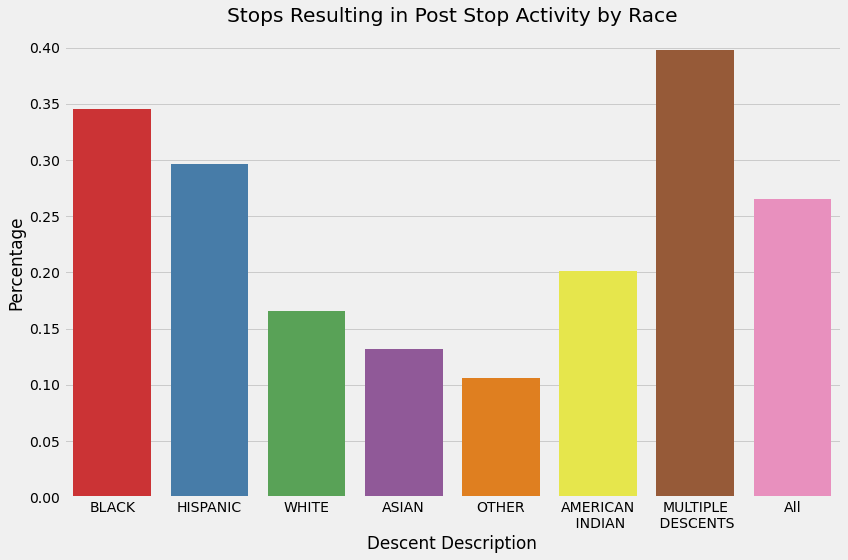

In [471]:
# Creates a bar graph with the percentage of post stop activity for each race

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(x = 'Descent Description', y = 'Post Stop %', data = post_stop, order=['BLACK', 'HISPANIC', 'WHITE', 'ASIAN', 'OTHER', 'AMERICAN INDIAN', 'MULTI-DESCENTS', 'All'], ax=ax, palette='Set1')

ax.set_title('Stops Resulting in Post Stop Activity by Race')
ax.set_xticks(np.arange(post_stop.shape[0]))
ax.set_xticklabels(['BLACK', 'HISPANIC', 'WHITE', 'ASIAN', 'OTHER', 'AMERICAN\n INDIAN', 'MULTIPLE\n DESCENTS', 'All'])
ax.set_ylabel('Percentage')
plt.tight_layout()
plt.savefig('stops_resulting_in_post_stop_activity.jpg', pad_inches=1)

Across all stops, post-stop activity happens about 27% of the time. 
The group to have their stops result in post stop activity the most are people of multiple-descents (but this makes up only a very small subset of all stops)
Black stops result in post stop activity, about 35% of the time, while Hispanic stops result in post-stop acitivty 30% of the time. White stops result in post stop activity about half that, at 17%. 


In [483]:
post_stop_year = pd.pivot_table(data=df, index=['Stop Year', 'Descent Description'], columns='Post Stop Activity Indicator', values='count', aggfunc=np.sum)     # Create a pivot table that finds the count of post stop activity per year per race. 
post_stop_year.columns = post_stop_year.columns.astype('str')
post_stop_year = post_stop_year.reset_index()
post_stop_year_2010 = post_stop_year[post_stop_year['Stop Year'].between(2010, 2014)]        # Only select the years 2010-2014
post_stop_year_2015 = post_stop_year[post_stop_year['Stop Year'].between(2015, 2019)]        # Only select the years 2015-2019

post_stop_year_2010 = post_stop_year_2010.groupby('Descent Description')['N', 'Y'].mean().reset_index()            # Calculates the average number of post_stop_activity instances from years 2010-2014 for each race
post_stop_year_2015 = post_stop_year_2015.groupby('Descent Description')['N', 'Y'].mean().reset_index()             # Calculates the average number of post_stop_activity instances from years 2015-2019 for each race


post_stop_year_2010['Post Stop %'] = post_stop_year_2010['Y'] / (post_stop_year_2010['Y'] + post_stop_year_2010['N'])    # Calculates the percentage of stops resulting in post_stop_activity from years 2010-2041 for each race
post_stop_year_2015['Post Stop %'] = post_stop_year_2015['Y'] / (post_stop_year_2015['Y'] + post_stop_year_2015['N'])    # Calculates the percentage of stops resulting in post_stop_activity from years 2015-2019 for each race
 
post_stop_year_2010['order'] = np.array([6,4,1,2,7,5,3])     # Used to re-order the bars for the bar plot so that it matches the ones above
post_stop_year_2015['order'] = np.array([6,4,1,2,7,5,3])

post_stop_year_2010 = post_stop_year_2010.sort_values('order')

post_stop_year_2015 = post_stop_year_2015.sort_values('order')


post_stop_year_2015

Post Stop Activity Indicator,Descent Description,N,Y,Post Stop %,order
2,BLACK,118830.2,68437.2,0.365452,1
3,HISPANIC,213721.2,96332.0,0.310695,2
6,WHITE,101689.6,21830.8,0.176738,3
1,ASIAN,23938.8,4128.8,0.147102,4
5,OTHER,24112.6,2637.6,0.098601,5
0,AMERICAN INDIAN,303.4,109.8,0.265731,6
4,MULTI-DESCENTS,1853.0,1168.5,0.386728,7


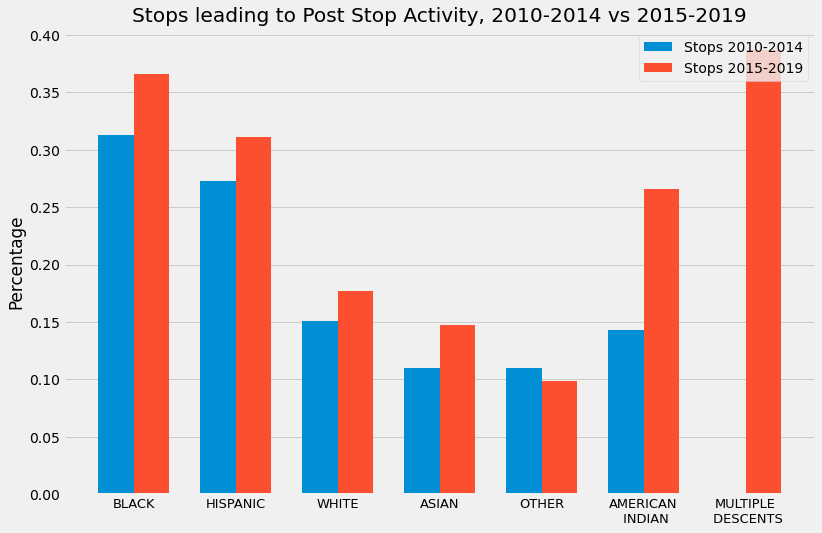

In [484]:
fig, ax6 = plt.subplots(figsize=(12, 8))

ind
width = 0.35

ax6.bar(x = ind-width/2, height=post_stop_year_2010['Post Stop %'], width=width, label='Stops 2010-2014')
ax6.bar(x = ind+width/2, height=post_stop_year_2015['Post Stop %'], width=width, label='Stops 2015-2019')
ax6.set_title('Post Stop Activity - 2010-2014 vs 2015-2019')
ax6.set_ylabel('Percentage')
ax6.set_title('Stops leading to Post Stop Activity, 2010-2014 vs 2015-2019')
ax6.set_xticks(ind)
ax6.set_xticklabels(['BLACK', 'HISPANIC', 'WHITE', 'ASIAN', 'OTHER', 'AMERICAN\n INDIAN', 'MULTIPLE\n DESCENTS'], fontsize=13)
ax6.grid(False, axis = 'x')
ax6.legend(loc='upper right')

plt.savefig('post_stop_activity_compared.jpg')


Here we can see that all races besides the "Other" category experienced an increase of post-stop activity from the first half of the decade to the last.
The increase in post stop activity among American Indians is most significant, almost doubling. 


## Evaluate the Results: Summary:

1. After controlling for population, it appears that Black people are pulled over far more than any other race. For every 10000 black residents, they are stopped over 5000 times. Hispanics are stopped about 1800 times per 10000 Hispanic residents, Whites are stopped about 1500 times per 10000 white residents, and Asians are stopped about 700 times per 10000 Asian residents. 
2. There was a sharp increase across all races from 2010 to 2011. Since 2011, overall stops have decreased for all races, though since 2015 there was a small uptick in stops.
3. As pedestrians, blacks are stopped 5.1 times more than whites (compared to 3.5 times overall). At night, blacks are stopped 5.7 times more often than whites.  
4. People of multiple descents, black, and hispanic have the highest rates of post stop activity, well above the average rate across all races of 27%. Other, Asian, and White people have the lowest rates of post stop activity. 